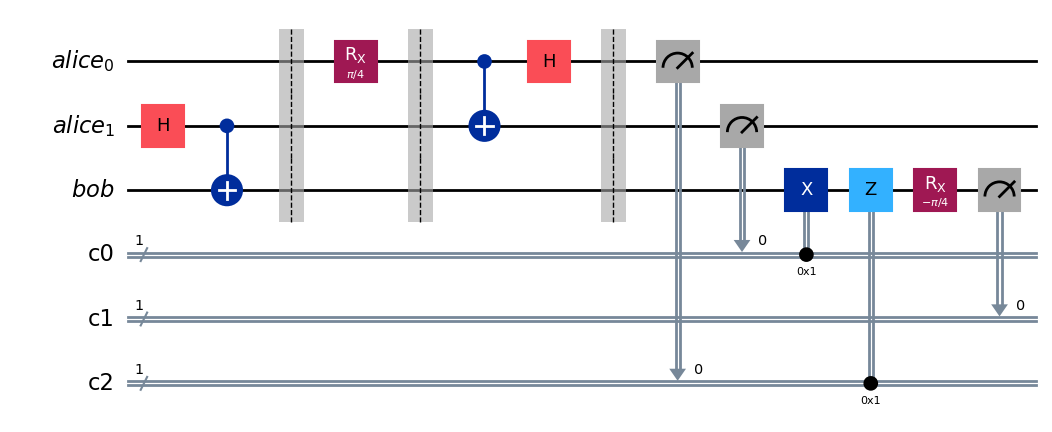

In [1]:
# QUANTUM TELEPORTATION ALGORITHM

# import QuantumCircuit class from qiskit library
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from math import pi

# create a circuit with 3 qubits
# alice wants to send a qubit to bob
alice_register = QuantumRegister(2, name="alice")
bob_register = QuantumRegister(1, name="bob")
qc = QuantumCircuit(alice_register, bob_register)

# CREATE A BELL PAIR, INSTANTIATE THE ENTANGLEMENT
# Hadamard Gate (H):       The Hadamard gate is a single-qubit gate 
#                           that puts a qubit into a superposition state.
# Controlled-NOT Gate (CX): The CNOT gate is a two-qubit gate where
#                            one qubit acts as the control and the other as the target.
#
# To measure the qubits, we create some classical registers.
qc.h(alice_register[1])
qc.cx(alice_register[1], bob_register[0])

alice_bell_classical_register = ClassicalRegister(1)
qc.add_register(alice_bell_classical_register)
bob_classical_register = ClassicalRegister(1)
qc.add_register(bob_classical_register)

# ψ represents the quantum state that Alice wants to teleport to Bob
# To create the state ψ, Alice applies a quarter of an X gate, 
# which means she applies an rx rotation by an angle of π/4 to her qubit.
# Classical register is added to the quantum circuit to store the measurement results later.
qc.barrier()
qc.rx(pi/4, alice_register[0])
alice_psi_classical_register = ClassicalRegister(1)
qc.add_register(alice_psi_classical_register)

# We are now at ψ_0, we apply our next two gates
qc.barrier()
qc.cx(alice_register[0], alice_register[1])
qc.h(alice_register[0])
qc.barrier()

# Measure Alice's quibits
# Send the information
qc.measure(alice_register[0], alice_psi_classical_register)
qc.measure(alice_register[1], alice_bell_classical_register)
qc.x(bob_register[0]).c_if(alice_bell_classical_register, 1) # Apply X to Bob if 2nd qubit measures to 1
qc.z(bob_register[0]).c_if(alice_psi_classical_register, 1) # Apply Z if 1st qubit measures to 1

# Finally, apply the -pi/4 gate to ensure we measure zeros
qc.rx(-pi/4, bob_register[0])
qc.measure(bob_register[0], bob_classical_register)

# Draw using LaTeX & Matplotlib
qc.draw(output='mpl')